### NYC Taxi dataset:
Use NYC's openly available taxi-fare dataset to predict the price of a Taxi ride. Our goal is to use TF as the ML Framework to build a pipeline which should be capable of scaling on infinite data to make an enterprise scale model.

###Xgboost Model

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/My Drive/DeepLearning/TaxiDataset/train.csv', sep=',',nrows=300000)
train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# datatypes
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
# Basic Stats of the data set
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,300000.000000,300000.000000,300000.000000,299998.000000,299998.000000,300000.000000
mean,11.359876,-72.523230,39.928171,-72.529448,39.927360,1.684403
std,9.932815,11.325144,8.953498,10.914682,6.546706,1.309132
min,-44.900000,-740.000000,-3116.285383,-1329.621332,-1189.615440,0.000000
25%,6.000000,-73.992050,40.734985,-73.991350,40.734059,1.000000
50%,8.500000,-73.981762,40.752737,-73.980116,40.753185,1.000000
75%,12.500000,-73.967097,40.767108,-73.963565,40.768095,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [6]:
print("old size: %d" % len(train))
train = train[train.fare_amount >=0]
print("New size: %d" % len(train))

old size: 300000
New size: 299985


In [7]:
# check missing data
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

In [8]:
print("old size: %d" % len(train))
train = train.dropna(how='any', axis=0)
print("New size after dropping missing value: %d" % len(train))

old size: 299985
New size after dropping missing value: 299983


Text(0, 0.5, 'Frequency')

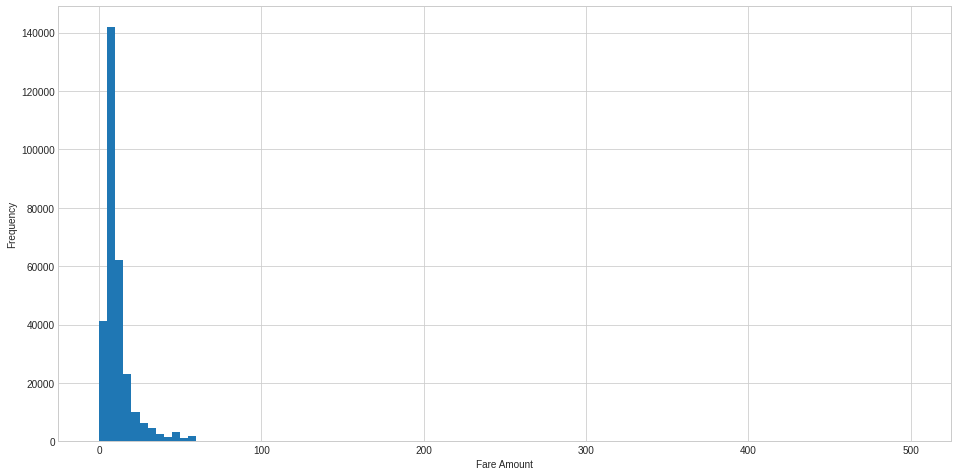

In [9]:
# Lets see the distribution of fare amount 
train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

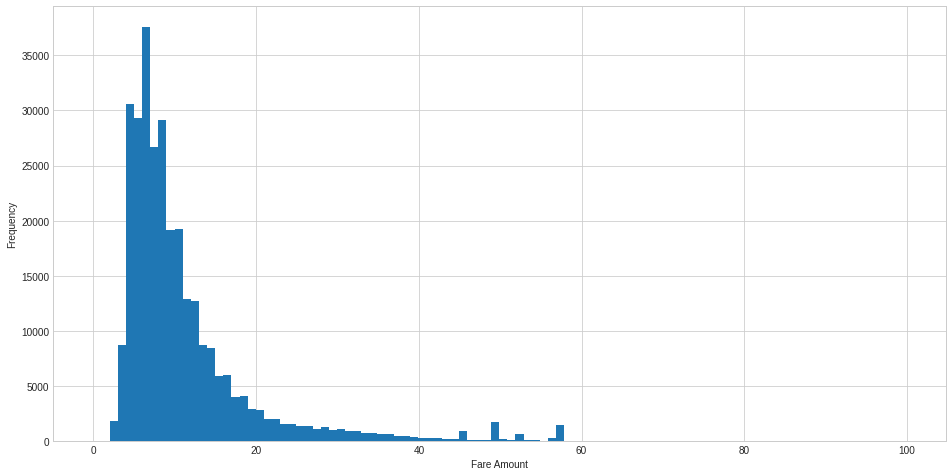

In [10]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [11]:
train[train.fare_amount >100 ].shape

(131, 8)

Text(0, 0.5, 'Frequency')

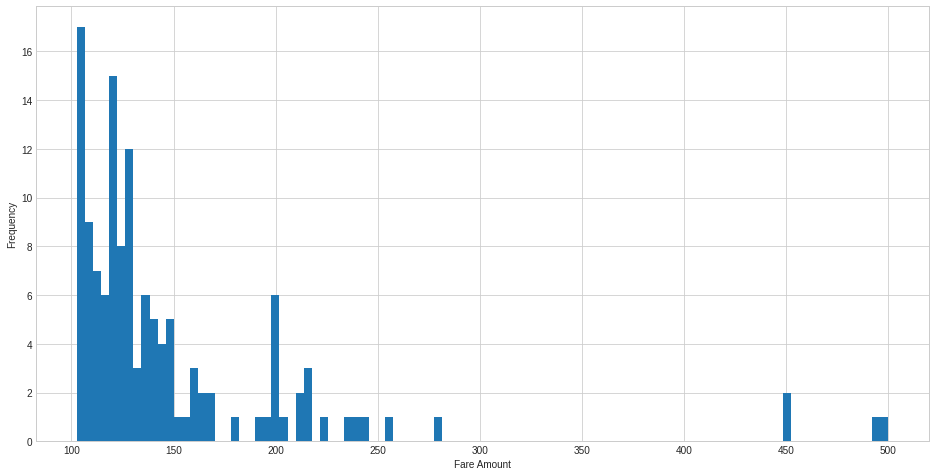

In [12]:
# Lets see the distribution of fare amount more than 100
train[train.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

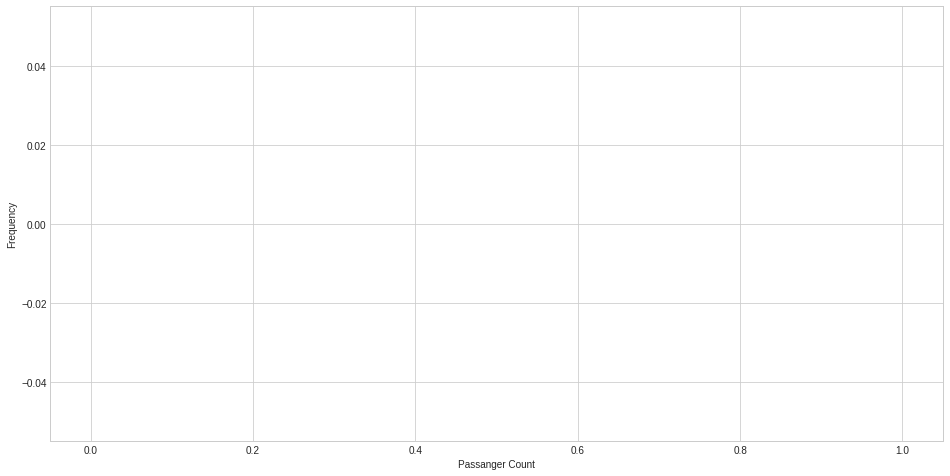

In [13]:
# checking for passanger count greater than 7
train[train.passenger_count >7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [14]:
# data for passanger count greater than 7
train[train.passenger_count >7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Text(0, 0.5, 'Frequency')

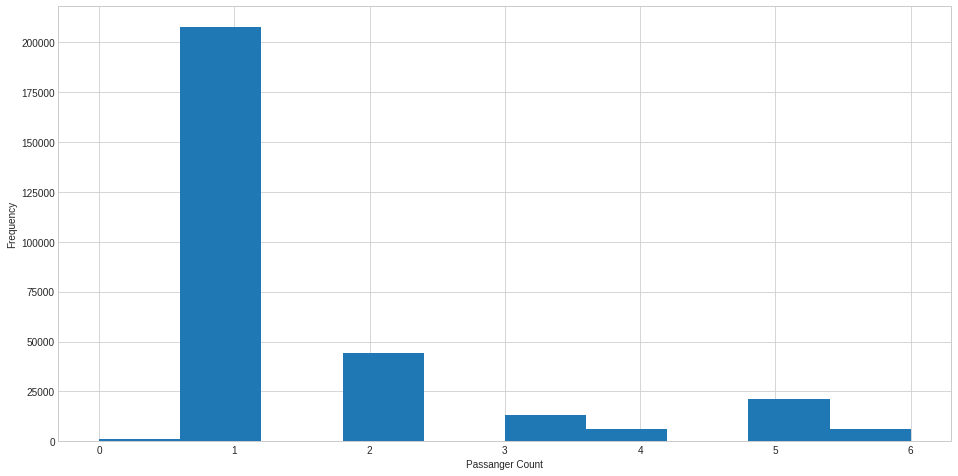

In [15]:
# checking for passanger count less than 7
train[train.passenger_count <7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [16]:
# checking for records where passanger count is 0
train[train.passenger_count ==0].shape

(1074, 8)

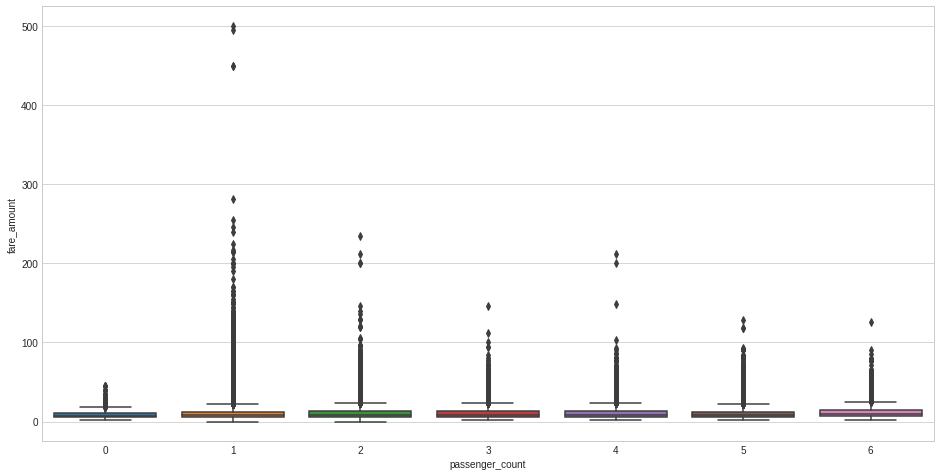

In [17]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [18]:
train[train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.012941
passenger_count,0.012941,1.000000


In [19]:
test = pd.read_csv('/content/drive/My Drive/DeepLearning/TaxiDataset/test.csv', sep=',')
test.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [20]:
#check for missing value
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
# checking for basic stats
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [22]:
min(test.pickup_longitude.min(),test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [23]:
min(test.pickup_latitude.min(),test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(),test.dropoff_latitude.max())

(40.568973, 41.709555)

In [24]:
# this function will also be used with the test set below
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [25]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(train))
train = train[select_within_test_boundary(train, BB)]
print('New size: %d' % len(train))

Old size: 299983
New size: 293740


# Time related features

In [26]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour_of_day'] = df.pickup_datetime.dt.hour

    df['minutes'] = df.pickup_datetime.dt.strftime("%M")
    df['minutes'] = df['minutes'].astype(int)

    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df["weekday"] = df.pickup_datetime.dt.weekday

    
    return df

In [27]:
train = prepare_time_features(train)
test = prepare_time_features(test)

In [28]:
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))   # 2*R*asin...

In [29]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [30]:
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                      test.dropoff_latitude, test.dropoff_longitude)

In [31]:
def transform(data):
    # Distances to nearby airports, 
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

train = transform(train)
test = transform(test)

In [32]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr


In [33]:
print("old size: %d" % len(train))
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
print("New size: %d" % len(train))

old size: 293740
New size: 293740


In [34]:
train[train['fare_amount']==0].shape

(7, 20)

In [35]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount']==0].index, axis=0)
print("New size: %d" % len(train))

old size: 293740
New size: 293733


In [36]:
train[train['fare_amount'] < 2.5].shape

(5, 20)

In [37]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)
print("New size: %d" % len(train))

old size: 293733
New size: 293728


In [38]:
train[train.passenger_count >= 7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr


In [39]:
print("old size: %d" % len(train))
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)
print("New size: %d" % len(train))

old size: 293728
New size: 293728


In [40]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,293728.0,11.342089,9.807051,2.500000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,293728.0,-73.975076,0.038686,-74.438233,-73.992265,-73.982055,-73.968325,-72.856968
pickup_latitude,293728.0,40.751116,0.029722,40.500046,40.736616,40.753470,40.767521,41.692428
dropoff_longitude,293728.0,-73.974077,0.038099,-74.474595,-73.991530,-73.980558,-73.965233,-72.854940
dropoff_latitude,293728.0,40.751466,0.032884,40.500046,40.735621,40.753922,40.768390,41.714633
passenger_count,293728.0,1.684896,1.309298,0.000000,1.000000,1.000000,2.000000,6.000000
hour_of_day,293728.0,13.510949,6.505785,0.000000,9.000000,14.000000,19.000000,23.000000
minutes,293728.0,29.535220,17.328401,0.000000,14.000000,30.000000,45.000000,59.000000
month,293728.0,6.274247,3.442156,1.000000,3.000000,6.000000,9.000000,12.000000
year,293728.0,2011.738568,1.863640,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [41]:
#train data set
pd.cut(train['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     284491
(10.0, 20.0]      6004
(20.0, 30.0]        43
(60.0, 70.0]        34
(50.0, 60.0]        18
(30.0, 40.0]         6
(40.0, 50.0]         2
Name: distance_miles, dtype: int64

In [42]:
# test data set
pd.cut(test['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     9611
(10.0, 20.0]     214
(60.0, 70.0]       3
(20.0, 30.0]       1
(50.0, 60.0]       0
(40.0, 50.0]       0
(30.0, 40.0]       0
Name: distance_miles, dtype: int64

In [43]:
# we will deal with it later 
fare_100 = train[train.fare_amount > 100]
fare_100.shape

(114, 20)

In [44]:
fare_100[fare_100.distance_miles <1].shape

(45, 20)

In [45]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour_of_day', 'minutes', 'month', 'year', 'weekday',
       'distance_miles', 'pickup_distance_to_jfk', 'dropoff_distance_to_jfk',
       'pickup_distance_to_ewr', 'dropoff_distance_to_ewr',
       'pickup_distance_to_lgr', 'dropoff_distance_to_lgr'],
      dtype='object')

In [46]:
# create copy of the data set
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
df_test = test.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
print(df_train.shape)
print(df_test.shape)

(293728, 18)
(9914, 17)


In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(234982, 17)
(58746, 17)
(234982,)
(58746,)


In [48]:
import xgboost as xgb

In [49]:
#params = {
#   
#    'max_depth': 7,
#    'gamma' :0,
#    'eta':.03, 
#    'subsample': 1,
#    'colsample_bytree': 0.9, 
#    'objective':'reg:linear',
#    'eval_metric':'rmse',
#    'silent': 0
#}

# XGBoost Model Tuning

In [50]:


params = {
   
    'max_depth': 8,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.7, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

#

In [51]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=7000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[06:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.3431
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:13.9644
[2]	test-rmse:13.5991
[3]	test-rmse:13.2622
[4]	test-rmse:12.9376
[5]	test-rmse:12.6051
[6]	test-rmse:12.303
[7]	test-rmse:12.0107
[8]	test-rmse:11.7111
[9]	test-rmse:11.4403
[10]	test-rmse:11.1583
[11]	test-rmse:10.8859
[12]	test-rmse:10.6401
[13]	test-rmse:10.3871
[14]	test-rmse:10.1587
[15]	test-rmse:9.92293
[16]	test-rmse:9.69398
[17]	test-rmse:9.47684
[18]	test-rmse:9.26587
[19]	test-rmse:9.08048
[20]	test-rmse:8.89777
[21]	test-rmse:8.70515
[22]	test-rmse:8.51939
[23]	test-rmse:8.35671
[24]	test-rmse:8.18569
[25]	test-rmse:8.03505
[26]	test-rmse:7.87718
[27]	test-rmse:7.72489
[28]	test-rmse:7.57556
[29]	test-rmse:7.43503
[30]	test-rmse:7.31235
[31]	test-rmse:7.19437
[32]	test-rmse:7.06862
[33]	test-rmse:6.94541
[34]	test-rmse:6.84099
[35]	test-rmse:6.73883

In [52]:
prediction = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit).tolist()

In [53]:
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:00+00:00,-73.973320,40.763805,-73.981430,40.743835,1,13,8,1,2015,1,1.443607,13.274326,12.792807,11.718491,10.785343,5.275249,6.068721
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:00+00:00,-73.986862,40.719383,-73.998886,40.739201,1,13,8,1,2015,1,1.507044,12.196699,13.399582,10.042731,9.817205,7.119935,7.035995
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:00+00:00,-73.982524,40.751260,-73.979654,40.746139,1,11,53,10,2011,5,0.384398,13.130080,12.804646,10.921174,10.928398,5.949126,5.923673
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:00+00:00,-73.981160,40.767807,-73.990448,40.751635,1,21,12,12,2012,5,1.218529,13.766807,13.485374,11.478334,10.550950,5.642243,6.338990
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:00+00:00,-73.966046,40.789775,-73.988565,40.744427,1,21,12,12,2012,5,3.347514,14.216819,13.127774,12.926314,10.450604,4.896995,6.401733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:00+00:00,-73.968124,40.796997,-73.955643,40.780388,6,12,37,5,2015,6,1.320336,14.654308,13.372190,13.110204,13.066168,5.116029,4.278349
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:00+00:00,-73.945511,40.803600,-73.960213,40.776371,6,17,5,1,2015,0,2.032486,14.233755,13.344366,14.346682,12.723911,4.170965,4.510944
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:00+00:00,-73.991600,40.726608,-73.789742,40.647011,6,20,44,4,2015,6,11.920349,12.644137,0.726759,9.916691,20.376600,7.068421,10.000717
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:00+00:00,-73.985573,40.735432,-73.939178,40.801731,6,1,5,1,2015,5,5.184402,12.666946,13.929041,10.391022,14.555692,6.504521,3.816918


In [54]:

holdout = pd.DataFrame({'key': test['key'], 'fare_amount': prediction})
holdout.to_csv('xgb_4m_utc_with_cleaning.csv', index=False)

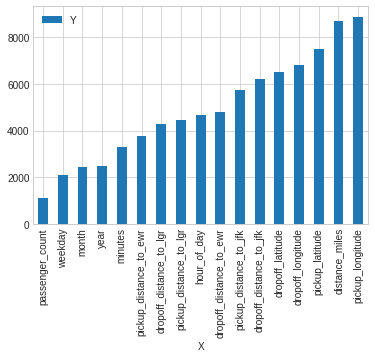

In [55]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')